# Question 2

## Part (a)

Using the CFL conditions for advection, and taking $D=0.01$, $U = -1$ we find that

$$\begin{split}
\frac{|U| \Delta t}{\Delta x} &< 1 \\
\frac{1 \Delta t}{\Delta x} &< 1 \\
\Delta t &< \Delta x
\end{split}$$

Similarly, for diffusion,

$$\begin{split}
\frac{D \Delta t}{\Delta x^2} &< \frac{1}{2} \\
\Delta t &< \frac{1}{2} \frac{1}{0.01} \Delta x^2 \\
\Delta t &< 50 \Delta x^2
\end{split}$$

In the simulation below, I set $\Delta t = 10 \Delta x^2$ to provide for a comfortable margin.

## Part (b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
# May need to run this to get the animation to work
import ipympl
%matplotlib widget

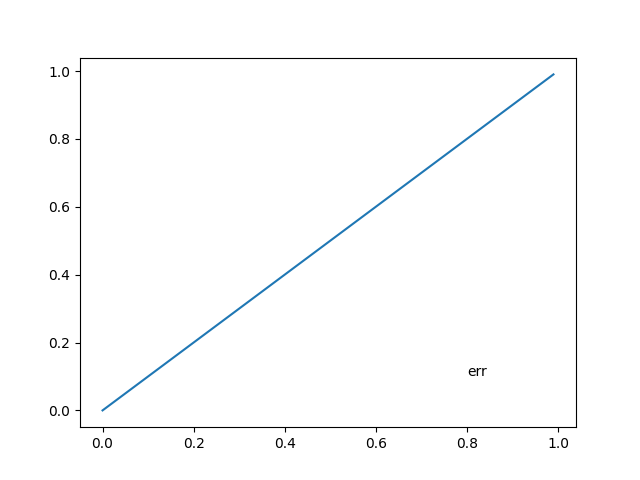

In [3]:
dx = 0.01
dt = 10 * dx**2
x = np.arange(0, 1, dx)
times = np.linspace(0, 10, int(10//dt))

D = 0.01
U = -1

# Initial condition
f = x.copy()
f_t_prev = np.zeros_like(f)

fig, ax = plt.subplots()
line, = ax.plot(x, f)
text = ax.text(0.8,  0.1, "err")

def update(t):
    global line, text, f, f_t_prev

    # 2nd order upwind
    f_x = np.zeros_like(f)
    f_x[:-2] = (3 * f[:-2] -4 * f[1:-1] + f[2:])

    # Fixing the RHS boundary to 1

    # 2nd order Upwind scheme
    f_x[:-2] = (3 * f[:-2] -4 * f[1:-1] + f[2:])
    f_x[-2] = (3 * f[-2] - 4 * 1 + 1)
    f_x[-1] = (3 * f[-1] -4 * 1 + 1)
    f_x /= (2 * -dx) # Negative because dx is negative since velocity is negative, so downwind is actually positive

    # Central difference
    # f_x[2:] = (3*f[2:] - 4*f[1:-1] + f[:-2])/(2*dx)
    # f_x[0] = (3*f[0] - 4*0 + 0)/(2*dx)
    # f_x[1] = (3*f[1] - 4*f[0] + 0)/(2*dx)
    
    # first-order upwind
    # f_x = np.zeros_like(f)
    # f_x[1:] = (f[1:] - f[:-1])/dx
    # f_x[0] = (f[0] - f[-1])/dx

    f_xx = np.zeros_like(f)
    # Central difference scheme for now for f_xx, we'll maybe change it later
    f_xx[1:-1] = f[2:] - 2*f[1:-1] + f[:-2]
    f_xx[0] = f[1] - 2 * 0 + 0
    f_xx[-1] = 1 - 2*1 + f[-2]
    f_xx /= dx**2

    # Here's our advection-diffusion equation
    f_t = D * f_xx - U * f_x

    if t == 0:
        # Euler's method on first frame
        f = (f + f_t * dt)
    else:
        # 2nd order Adams-Bashforth for all frames after the first
        f = (f + dt * (3/2 * f_t - 1/2 * f_t_prev))

    # Force boundary conditions
    f[0] = 0
    f[-1] = 1

    f_t_prev = f_t

    text.set_text(f'$t = {t:00.3f} $')
    line.set_ydata(f)

    return line, text

anim = animation.FuncAnimation(fig, update, frames=times, blit=True, repeat=False, interval=1)

plt.show()


I don't know if this is what we're supposed to get; it looks kind of boring, but it's stable, so I'm going with this.